In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set_palette("Set2")

In [7]:
df = pd.read_csv("/Users/esrefyigitbas/Desktop/olimpiyatlar.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
df.shape

(271116, 15)

In [26]:
df = df.drop(["ID","Games"],axis = 1)
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [8]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [33]:
df["Age"] = df.groupby("Event")["Age"].transform(lambda x: x.fillna(x.mean()))

In [38]:
df["Age"].isnull().sum()

142

In [39]:
all_nan_events = df.groupby("Event")["Age"].apply(lambda x: x.isnull().all())
print(all_nan_events[all_nan_events==True])

Event
Archery Men's Pole Archery, Large Birds, Individual    True
Archery Men's Pole Archery, Large Birds, Team          True
Archery Men's Pole Archery, Small Birds, Individual    True
Archery Men's Pole Archery, Small Birds, Team          True
Rowing Men's 17-Man Naval Rowing Boats                 True
Rowing Men's 6-Man Naval Rowing Boats                  True
Sailing Mixed 18 foot                                  True
Swimming Men's 100 metres Freestyle For Sailors        True
Name: Age, dtype: bool


In [40]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [41]:
df["Age"].isnull().sum()

0

In [42]:
df["Height"] = df.groupby(["Sport","Sex"])["Height"].transform(lambda x: x.fillna(x.mean()))
df["Weight"] = df.groupby(["Sport","Sex"])["Weight"].transform(lambda x: x.fillna(x.mean()))

Age sütunundaki NaN değerler eventlerin yaş ortaalamasına göre dolduruldu

In [43]:
df["Height"].isnull().sum()

100

In [44]:
df["Weight"].isnull().sum()

595

In [45]:
missing_groups_height = df[df["Height"].isnull()].groupby(["Sport","Sex"]).size()
print(missing_groups_height)

missing_groups_weight = df[df["Weight"].isnull()].groupby(["Sport","Sex"]).size()
print(missing_groups_weight)

Sport                Sex
Aeronautics          M       1
Alpinism             F       1
                     M      24
Basque Pelota        M       2
Cricket              M      24
Croquet              F       6
                     M      13
Military Ski Patrol  M      24
Motorboating         F       1
Roque                M       4
dtype: int64
Sport                Sex
Aeronautics          M        1
Alpinism             F        1
                     M       24
Art Competitions     F      377
Basque Pelota        M        2
Cricket              M       24
Croquet              F        6
                     M       13
Jeu De Paume         M       11
Military Ski Patrol  M       24
Motorboating         F        1
Polo                 M       95
Racquets             M       12
Roque                M        4
dtype: int64


In [49]:
df["Height"] = df["Height"].fillna(df["Height"].mean())
df["Weight"] = df["Weight"].fillna(df["Weight"].mean())

In [50]:
df["Height"].isnull().sum()

0

In [51]:
df["Weight"].isnull().sum()

0

In [52]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [93]:
df["Medal"] = df["Medal"].fillna("No Medal")

In [94]:
df["Medal"].isnull().sum()

0

In [95]:
print(df.describe(include="all"))# sayısal ve kategorik özet
print("**************************************************")
print(df["Sex"].value_counts())
print("**************************************************")
print(df["Team"].nunique(), "ülke/ekip var")
print("**************************************************")
print(df["Sport"].nunique(), "farklı spor branşı var")

                   ID                  Name     Sex            Age  \
count   271116.000000                271116  271116  271116.000000   
unique            NaN                134732       2            NaN   
top               NaN  Robert Tait McKenzie       M            NaN   
freq              NaN                    58  196594            NaN   
mean     68248.954396                   NaN     NaN      25.628123   
std      39022.286345                   NaN     NaN       6.394118   
min          1.000000                   NaN     NaN      10.000000   
25%      34643.000000                   NaN     NaN      22.000000   
50%      68205.000000                   NaN     NaN      24.991036   
75%     102097.250000                   NaN     NaN      28.000000   
max     135571.000000                   NaN     NaN      97.000000   

               Height         Weight           Team     NOC        Games  \
count   271116.000000  271116.000000         271116  271116       271116   
unique 

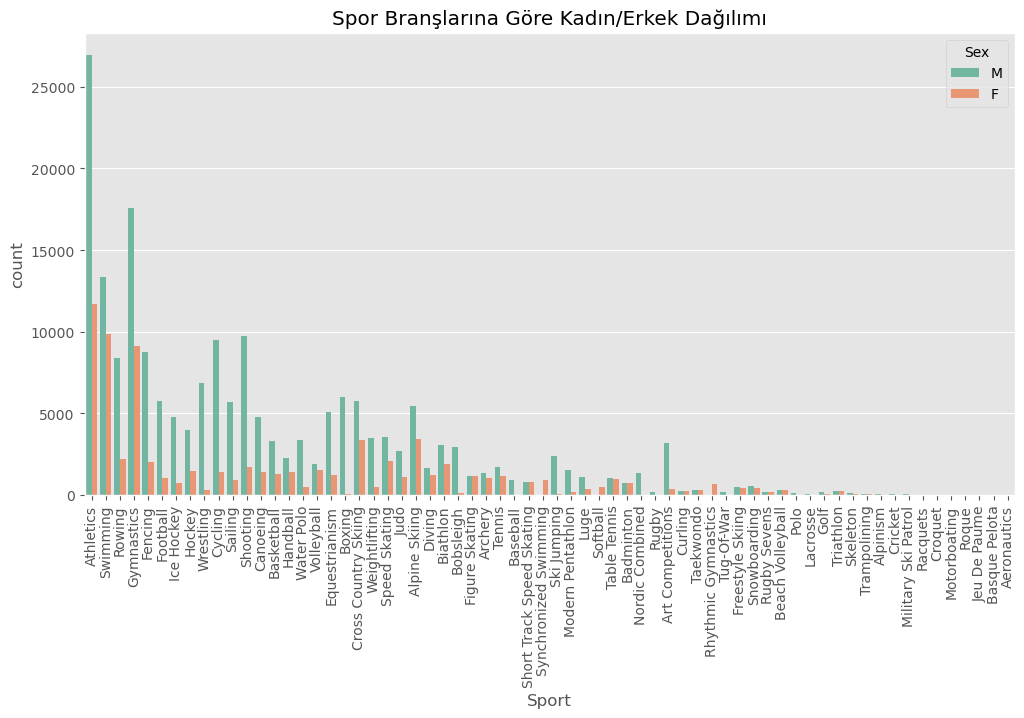

In [96]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Sport", hue="Sex", order=df2["Sport"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Spor Branşlarına Göre Kadın/Erkek Dağılımı")
plt.show()

In [97]:
medals_by_country = df.groupby("NOC")["Medal"].value_counts().unstack(fill_value=0)
medals_by_country["Total"] = medals_by_country.sum(axis=1)
medals_by_country.sort_values("Total", ascending=False).head(10)

Medal,Bronze,Gold,No Medal,Silver,Total
NOC,,,,,
USA,1358,2638,13216,1641,18853
FRA,666,501,10981,610,12758
GBR,651,678,10188,739,12256
ITA,531,575,9078,531,10715
GER,746,745,7665,674,9830
CAN,451,463,8381,438,9733
JPN,357,247,7531,309,8444
SWE,535,479,6803,522,8339
AUS,517,348,6318,455,7638


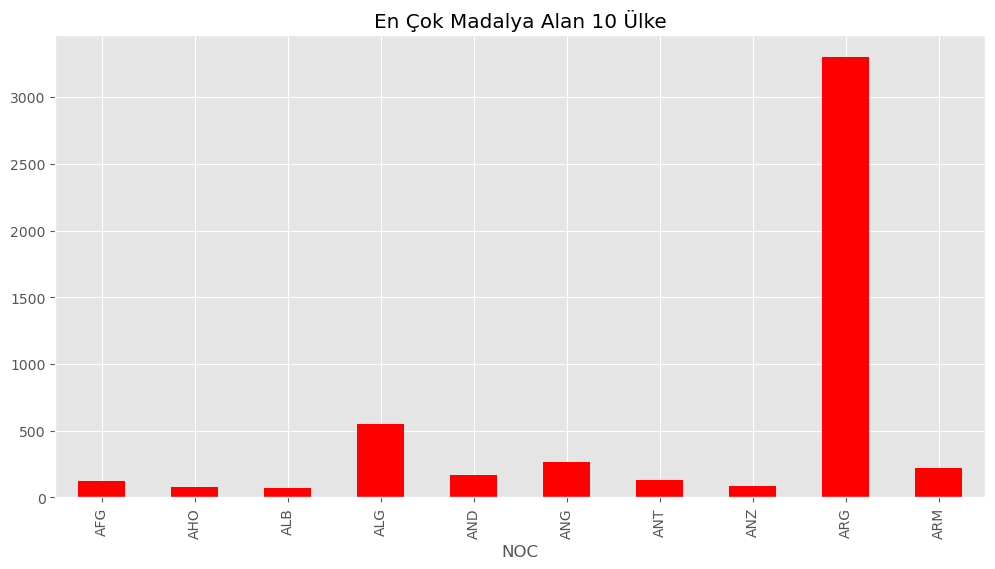

In [98]:
medals_by_country["Total"].head(10).plot(kind="bar", figsize=(12,6), title="En Çok Madalya Alan 10 Ülke", color="red")
plt.show()

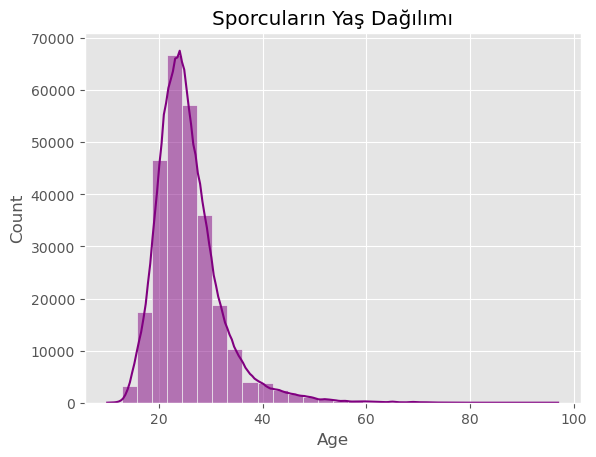

In [99]:
sns.histplot(df["Age"], bins=30, kde=True,color="purple")
plt.title("Sporcuların Yaş Dağılımı")
plt.show()

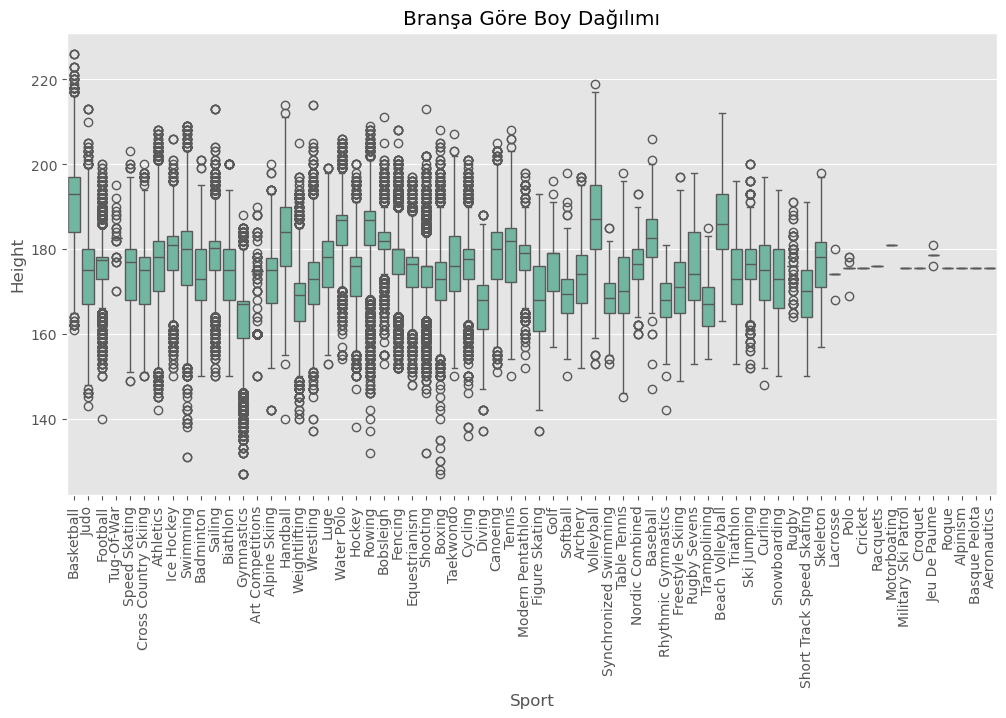

In [100]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Sport", y="Height")
plt.xticks(rotation=90)
plt.title("Branşa Göre Boy Dağılımı")
plt.show()

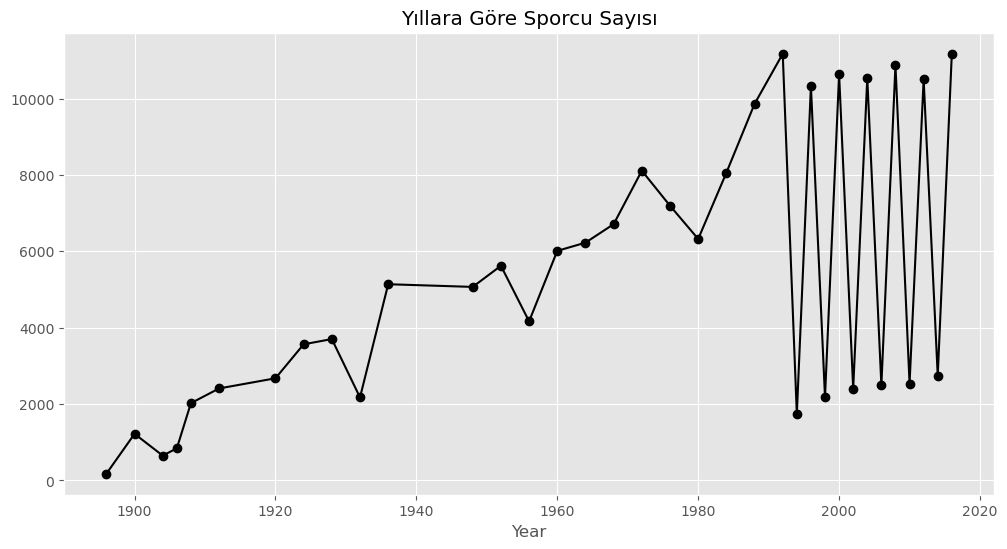

In [101]:
df.groupby("Year")["Name"].nunique().plot(figsize=(12,6), marker="o",color = "black")
plt.title("Yıllara Göre Sporcu Sayısı")
plt.show()

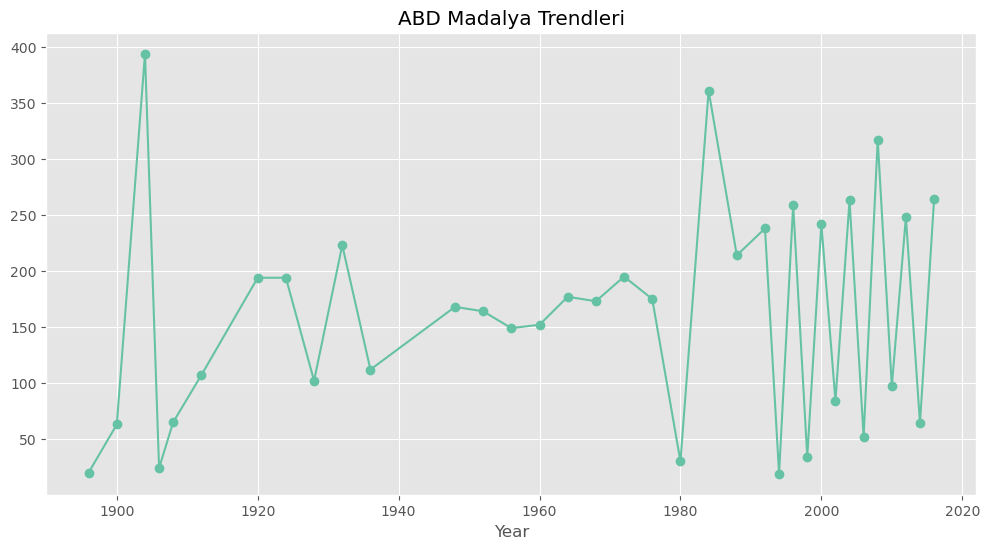

In [102]:
usa_medals = df[(df["NOC"]=="USA") & (df["Medal"]!="No Medal")].groupby("Year")["Medal"].count()
usa_medals.plot(figsize=(12,6), marker="o", title="ABD Madalya Trendleri")
plt.show()

In [103]:
medal_mapping = {"No Medal":0, "Bronze":1, "Silver":2, "Gold":3}
df["Medal_num"] = df["Medal"].map(medal_mapping)

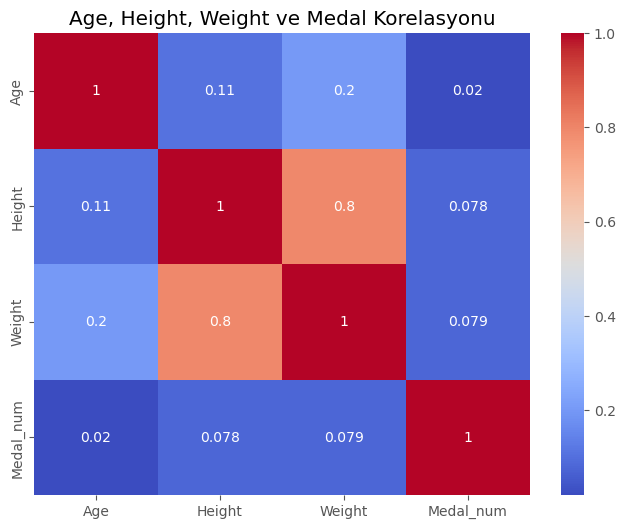

In [104]:
num_cols = ["Age", "Height", "Weight", "Medal_num"]

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Age, Height, Weight ve Medal Korelasyonu")
plt.show()

In [105]:
medals_by_sport = df.groupby(["Sport","Medal"]).size().unstack(fill_value=0)

In [106]:
medals_by_sport_prob = medals_by_sport.div(medals_by_sport.sum(axis=1), axis=0)
medals_by_sport_prob.head()

Medal,Bronze,Gold,No Medal,Silver
Sport,,,,
Aeronautics,0.000000,1.000000,0.000000,0.000000
Alpine Skiing,0.015970,0.016197,0.951523,0.016310
Alpinism,0.000000,1.000000,0.000000,0.000000
Archery,0.041988,0.057841,0.848757,0.051414
Art Competitions,0.014254,0.013695,0.956400,0.015651


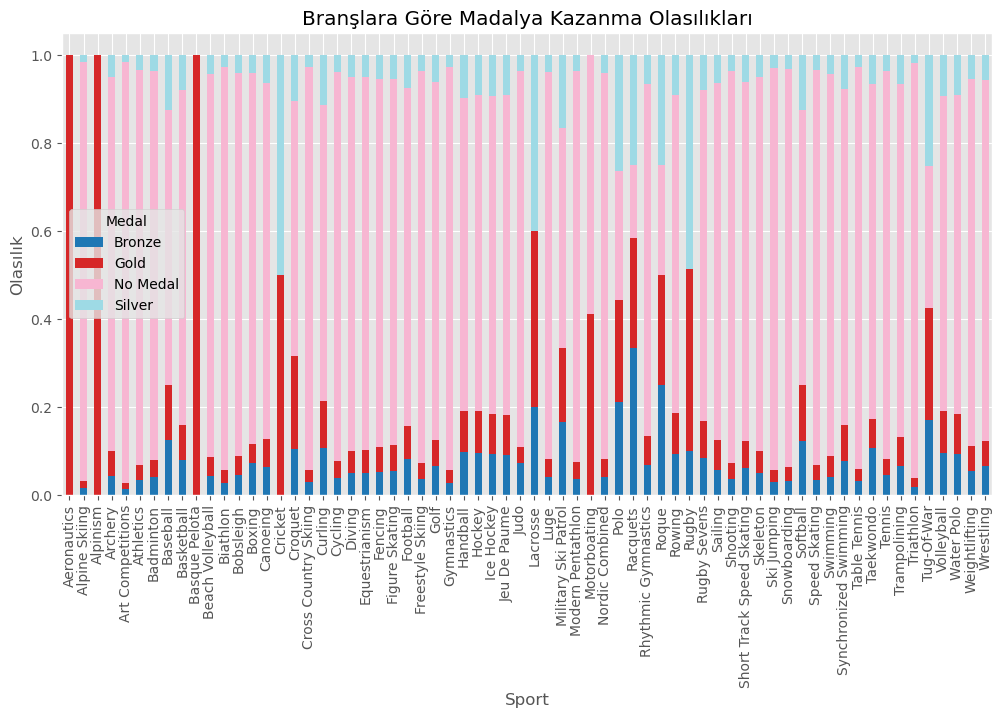

In [107]:
medals_by_sport_prob.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Branşlara Göre Madalya Kazanma Olasılıkları")
plt.ylabel("Olasılık")
plt.show()